Ex.1. Extraction of Tag-Based Information from HTML files (BeautifulSoup)
Extract addresses, quotes, text written in bold, links and tables present in some HTML-file
obtained from Wikipedia.

In [1]:
import os
import json
import requests
from bs4 import BeautifulSoup

url = "https://ru.wikipedia.org/wiki/Веб-скрейпинг"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

body = soup.find(id="bodyContent")
title = soup.find("title")

links = soup.find(id="bodyContent").find_all("a")
wiki_links = list(
    map(
        lambda x: x["href"],
        filter(lambda x: x.get("href") and x["href"].find("/wiki/") != -1, links),
    )
)
{"title": title.text, "body": body.text, "links": wiki_links}

{'title': 'Веб-скрейпинг — Википедия',
 'body': '\nМатериал из Википедии — свободной энциклопедии\nТекущая версия страницы пока не проверялась опытными участниками и может значительно отличаться от версии, проверенной 21 августа 2023 года; проверки требует 1 правка.\nТекущая версия страницы пока не проверялась опытными участниками и может значительно отличаться от версии, проверенной 21 августа 2023 года; проверки требует 1 правка.\n\n\n\n\n\nПерейти к навигации\nПерейти к поиску\nПроцесс Веб-скрейпинга\nВеб-скрейпинг (или скрепинг, или скрапинг← англ.\xa0web scraping)\xa0— это технология получения веб-данных путём извлечения их со страниц веб-ресурсов[1]. Веб-скрейпинг может быть сделан вручную пользователем компьютера, однако термин обычно относится к автоматизированным процессам, реализованным с помощью кода, который выполняет GET-запросы на целевой сайт[2].\nВеб-скрейпинг используется для синтаксического преобразования веб-страниц в более удобные для работы формы[3]. Веб-страницы с

Ex.2. Analyzing the Content of Colab page (in HTML Format) (BeautifulSoup)
Analyze the content of some colab.html: count the number of images, list the packages that have
been imported, and check models and their performance.

In [2]:
from bs4 import BeautifulSoup

html_content = requests.get(
    "https://colab.research.google.com/drive/1pXwXUUF2qNyTbw0b2iFGbs_GcgxPcJm0#scrollTo=YeJWGc96apKm"
).content
soup = BeautifulSoup(html_content, "html.parser")

# Count the number of images in the HTML content
images = soup.find_all("img")
num_images = len(images)
print(f"Number of images: {num_images}")

# List the packages that have been imported
imported_packages = [
    package.text for package in soup.find_all("span", {"class": "import_module"})
]
print(f"Imported packages: {imported_packages}")

# Check models and their performance
models = {}
performance = {}
for model in soup.find_all("div", {"class": "model"}):
    model_name = model.find("h3").text
    model_performance = model.find("p", {"class": "performance"}).text
    models[model_name] = model_performance

print("Models and their performance:")
for model, perf in models.items():
    print(f"Model: {model}, Performance: {perf}")

Number of images: 0
Imported packages: []
Models and their performance:


Ex.3. Dealing with JSON Files
Find or prepare JSON file, extract information from file in corresponding with some specific.
Use json library

In [3]:
import json

with open("data.json", "r") as file:
    data = json.load(file)

specific_data = data.get("skills")

if specific_data:
    print(f"Specific data: {specific_data}")
else:
    print("Specific data not found in the JSON file.")

Specific data: ['Python', 'JavaScript', 'SQL']


Ex.4. Dealing with Local XML Files
Find or prepare XML-file, extract information from file in corresponding with some specific.
Use xml.etree.ElementTree library
parse, getroot, tag

In [4]:
import xml.etree.ElementTree as ET

tree = ET.parse("data.xml")
root = tree.getroot()

# Extract information from the XML data
name = root.find("name").text
age = int(root.find("age").text)
city = root.find("city").text
skills = root.find("skills").text
experience_years = int(root.find("experience").find("years").text)
experience_title = root.find("experience").find("title").text

# Print the extracted information
print("Name:", name)
print("Age:", age)
print("City:", city)
print("Skills:", skills)
print("Experience Years:", experience_years)
print("Experience Title:", experience_title)

Name: Alice
Age: 30
City: New York
Skills: Python, JavaScript, SQL
Experience Years: 7
Experience Title: Software Engineer


Ex.5. Collecting Data Using APIs.
Chose one of the Public APIs, make short description of this and its specific.
Load JSON data and print it. Create DataFrame of the fetched data and print it.
https://github.com/public-apis/public-apis

In [7]:
import requests
import pandas as pd

endpoint = "https://cat-fact.herokuapp.com"
query = "/facts/random?animal_type=cat&amount=5"

url = endpoint + query
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)

    df = pd.DataFrame(data)
    display(df)
else:
    print("Failed to fetch data from the API. Status code:", response.status_code)

[{'status': {'verified': None, 'sentCount': 0}, '_id': '627184a06703b18683186517', 'user': '6263c963f782346dbf66f6a0', 'text': '             .', 'type': 'cat', 'deleted': False, 'createdAt': '2022-05-03T19:38:08.492Z', 'updatedAt': '2022-05-03T19:38:08.492Z', '__v': 0}, {'status': {'verified': None, 'sentCount': 0}, '_id': '630b1b9d96c89aedf1c7396a', 'user': '62ff309afc6e8f84d6102c8b', 'text': 'Cats only meow as a way to communicate with humans.', 'type': 'cat', 'deleted': False, 'createdAt': '2022-08-28T07:39:09.703Z', 'updatedAt': '2022-08-28T07:39:09.703Z', '__v': 0}, {'status': {'verified': None, 'sentCount': 0}, '_id': '62a5b3ce8693c42ae7ed86db', 'user': '62a50b21e890c82c536fb865', 'text': 'Новый.', 'type': 'cat', 'deleted': False, 'createdAt': '2022-06-12T09:37:18.528Z', 'updatedAt': '2022-06-12T09:37:18.528Z', '__v': 0}, {'status': {'verified': None, 'sentCount': 0}, '_id': '647ece8daed9a74e52cf5c4a', 'user': '647ece84aed9a74e52cf5c43', 'text': 'Dom.', 'type': 'cat', 'deleted': 

,status,_id,user,text,type,deleted,createdAt,updatedAt,__v
0,"{'verified': None, 'sentCount': 0}",627184a06703b18683186517,6263c963f782346dbf66f6a0,.,cat,False,2022-05-03T19:38:08.492Z,2022-05-03T19:38:08.492Z,0
1,"{'verified': None, 'sentCount': 0}",630b1b9d96c89aedf1c7396a,62ff309afc6e8f84d6102c8b,Cats only meow as a way to communicate with hu...,cat,False,2022-08-28T07:39:09.703Z,2022-08-28T07:39:09.703Z,0
2,"{'verified': None, 'sentCount': 0}",62a5b3ce8693c42ae7ed86db,62a50b21e890c82c536fb865,Новый.,cat,False,2022-06-12T09:37:18.528Z,2022-06-12T09:37:18.528Z,0
3,"{'verified': None, 'sentCount': 0}",647ece8daed9a74e52cf5c4a,647ece84aed9a74e52cf5c43,Dom.,cat,False,2023-06-06T06:13:33.133Z,2023-06-06T06:13:33.133Z,0
4,"{'verified': None, 'sentCount': 0}",6419e9b358ed542f4eb9811d,64014dd59444b2a501a1107b,Try.,cat,False,2023-03-21T17:30:27.556Z,2023-03-21T17:30:27.556Z,0


Ex.6. Extracting Data from local Files.
Extract data from different local files with different libraries.
Files: pdf, image file, excel file, word file.

PDF Text:
 Lapu%n Fedor Summary This text discusses the concept of energy intensity (EI), which measures the amount of energy needed to produce a unit of economic output. It emphasizes the significance of reducing energy intensity for global competitiveness, environmental sustainability, and energy security. It specifically focuses on Indonesia's energy challenges, highlighting its high contribution to global energy consumption and emissions. The text examines Indonesia's electricity generation mix, its progress in energy efficiency, and the need to reduce energy intensity despite its high primary energy intensity. The paper aims to analyze the factors influencing energy intensity in Indonesia, focusing on the impact of the energy transition, renewable energy sources, and financial development. It also discusses the role of government subsidies in energy consumption. Next the text discusses various empirical studies examining factors affecting energy intensity (EI) and the implications

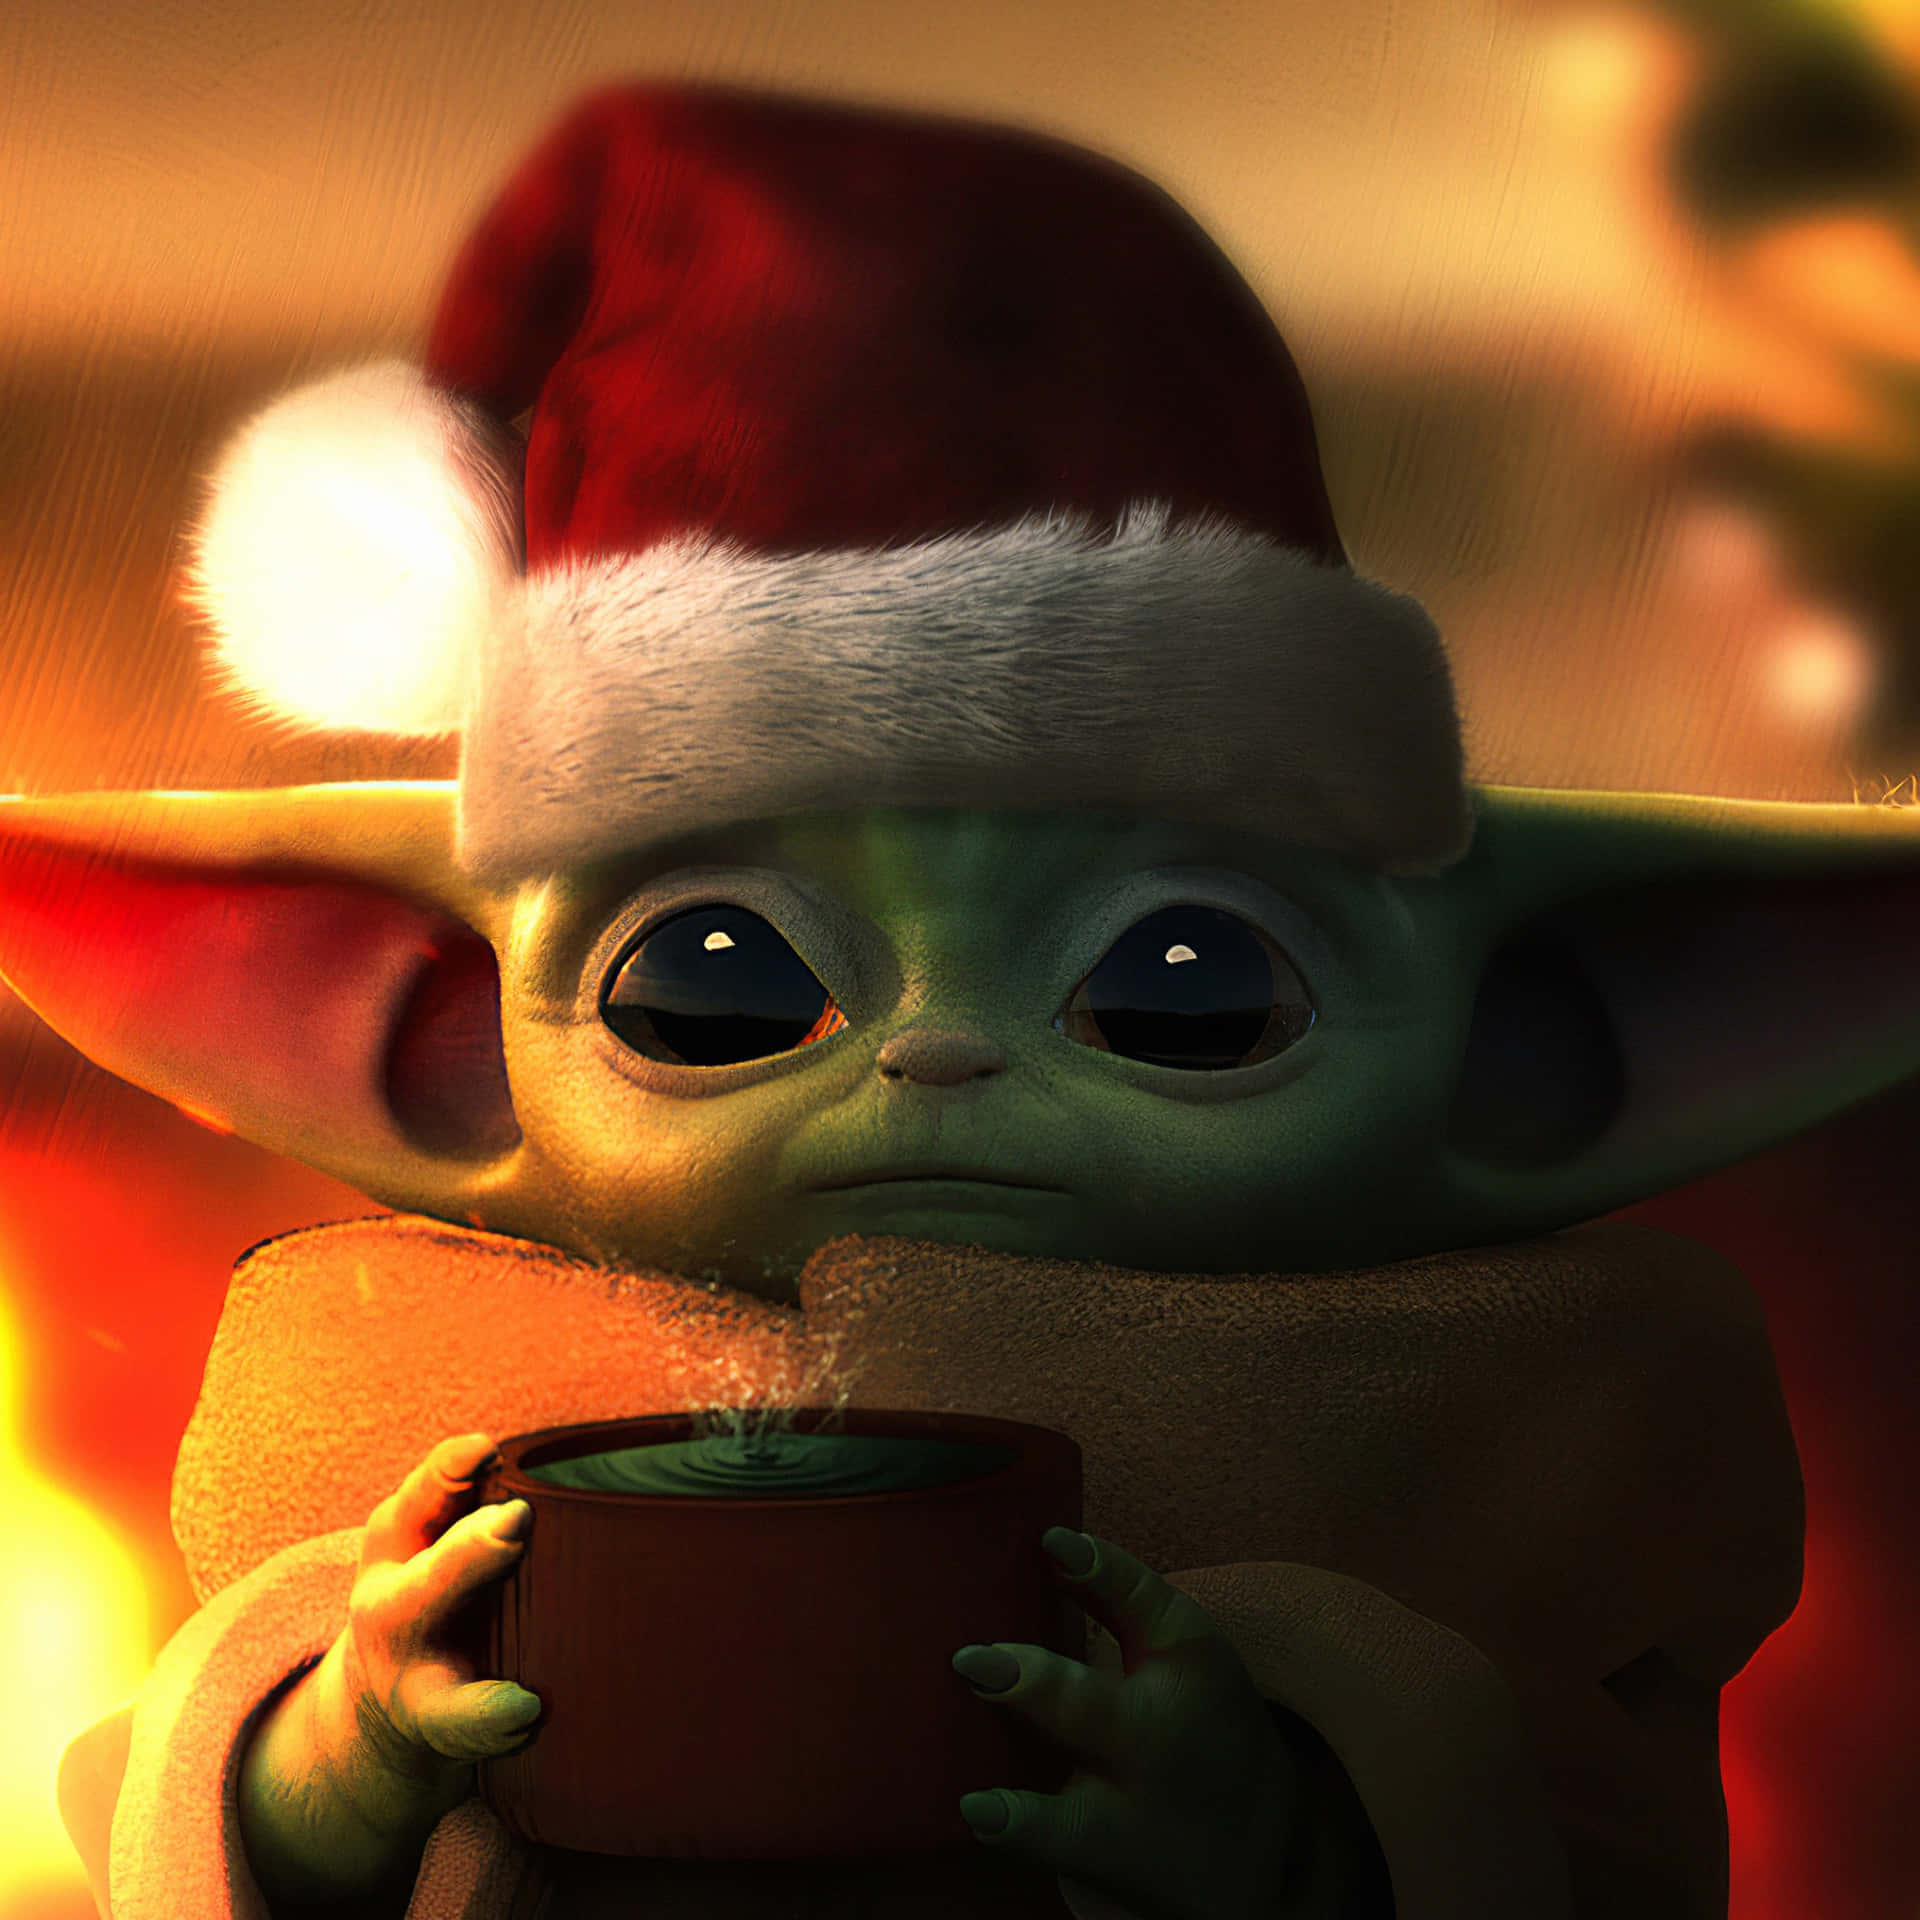

,question,feb_prediction,feb_score,feb_label,jan_prediction,jan_score,jan_label
0,Кто действующий чемпион Формула один?,Кто действующий чемпион формулы-1?,0.965544,1,Что такое список чемпионов мира формулы-1?,0.802575,0
1,Назови фрукты которые выращивают в Абхазии?,"Назови фрукты, которые выращивают в абхазии?",0.994761,1,Какие есть фрукты?,0.772521,0
2,В каких регионах водится медведи?,В каких регионах водятся медведи?,0.986215,1,Какие есть медведи?,0.838085,0
3,В каком году была выпущена первая ламборджини?,В каком году была выпущена первая ламборджини?,0.999998,1,Когда основали компанию Ламборгини?,0.830041,0
4,В каком году была основана Русь?,В каком году была основана русь?,0.950819,1,В каком году основали Русское государство?,0.911746,0
...,...,...,...,...,...,...,...
273,Сколько минут варить яйца вкрутую?,Сколько времени варить яйца?,0.922321,1,Как быстро сварить яйцо пашот?,0.783816,0
274,Сколько человек живёт в Томской области?,Что такое Население Томской области?,0.937591,1,Что такое Население Томской области?,0.937592,0
275,Температура по шкале Фаренгейта в градусы Цель...,Как удобно переводить единицы измерения по шка...,0.838768,1,Что такое «247 градусов по фаренгейту»?,0.803011,0
276,Химический состав воды?,Что такое изотопный состав воды?,0.839740,1,Что такое изотопный состав воды?,0.839740,0


Word Text:
 SummaryThis text discusses the concept of energy intensity (EI), which measures the amount of energy needed to produce a unit of economic output. It emphasizes the significance of reducing energy intensity for global competitiveness, environmental sustainability, and energy security. It specifically focuses on Indonesia's energy challenges, highlighting its high contribution to global energy consumption and emissions. The text examines Indonesia's electricity generation mix, its progress in energy efficiency, and the need to reduce energy intensity despite its high primary energy intensity. The paper aims to analyze the factors influencing energy intensity in Indonesia, focusing on the impact of the energy transition, renewable energy sources, and financial development. It also discusses the role of government subsidies in energy consumption.Next the text discusses various empirical studies examining factors affecting energy intensity (EI) and the implications of these find

In [11]:
import PyPDF2
from PIL import Image
import pandas as pd
from docx import Document

# Extract data from PDF file
pdf_file_path = "sample.pdf"
with open(pdf_file_path, "rb") as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    num_pages = len(pdf_reader.pages)
    pdf_text = ""
    for page_num in range(num_pages):
        page = pdf_reader.pages[page_num]
        pdf_text += page.extract_text()
    print("PDF Text:\n", pdf_text[:1000])

# Extract data from image file
image_file_path = "sample.jpg"
image = Image.open(image_file_path)
display(image)

# Extract data from Excel file
excel_file_path = "sample.xlsx"
df = pd.read_excel(excel_file_path)
display(df)

# Extract data from Word file
word_file_path = "sample.docx"
doc = Document(word_file_path)
word_text = ""
for para in doc.paragraphs:
    word_text += para.text
print("Word Text:\n", word_text[:1000])

Ex.7. Performing Various Operations on Local Files.
Perform various file operations such as open, read, append, close on local files.
- create local file and write a little content in it;
- add more text into an existing text file;
- read the content from the text file;
- open text files with various encodings;
- close the opened file.

In [12]:
# New file
with open("new_file.txt", "w") as file:
    file.write("This is some initial content.\n")

# Append
with open("existing_file.txt", "a") as file:
    file.write("This text is appended to the existing file.\n")

# Read
with open("existing_file.txt", "r") as file:
    content = file.read()
    print("Content of existing_file.txt:")
    print(content)

# Encodings
with open("existing_file.txt", "r", encoding="utf-8") as file_utf8:
    content_utf8 = file_utf8.read()
    print("\nContent of existing_file.txt (UTF-8 encoding):")
    print(content_utf8)

with open("existing_file.txt", "r", encoding="latin-1") as file_latin1:
    content_latin1 = file_latin1.read()
    print("\nContent of existing_file.txt (Latin-1 encoding):")
    print(content_latin1)

if not file.closed:
    file.close()

Content of existing_file.txt:
This text is appended to the existing file.


Content of existing_file.txt (UTF-8 encoding):
This text is appended to the existing file.


Content of existing_file.txt (Latin-1 encoding):
This text is appended to the existing file.

